In [ ]:

import tensorflow as tf
x2 = tf.linspace(-1.0, 1.0, 10)
print(x2) 

g = tf.get_default_graph()
print([op.name for op in g.get_operations()])


sess = tf.Session()
print(sess.run(x2))
sess.close()

In [ ]:
import tensorflow as tf

x = tf.constant(1.0, name="x")
w = tf.constant(0.8, name="weight")
y = tf.mul(x,w, name="output")

g = tf.get_default_graph()
print([op.name for op in g.get_operations()])
sess = tf.Session()
summary_writer = tf.train.SummaryWriter(r'C:\Users\06411\Documents\logs\test_x', sess.graph_def)
print(sess.run(y))
sess.close()

In [ ]:
import tensorflow as tf

In [ ]:
!cd

In [ ]:
!tensorboard logdir=r'C:\Users\06411\Documents\logs\test_x'

In [ ]:
import tensorflow as tf

x = tf.constant(1.0, name="x")
w = tf.constant(0.8, name="weight")
y = tf.mul(x,w, name="output")

g = tf.get_default_graph()
op =  g.get_operations()
print(op[0].node_def)


In [ ]:
import tensorflow as tf

xx = tf.constant([1,2,3], name="x")

g = tf.get_default_graph()
op =  g.get_operations()

print(op[0].node_def)

In [ ]:
import tensorflow as tf

#그래프를 만들고 
g = tf.Graph()
print(g)

#현재 그래프에 추가
with g.as_default():
    # Define operations and tensors in `g`.
    c = tf.constant(30.0,name="ccc")
    print(c.graph)
    print(c.graph is g)
    

In [ ]:
dir(g)

In [ ]:
c = tf.mul(10, 20)
print(type(c))
print(c.name)


In [ ]:
import numpy as np

a = np.zeros((2,2))
print(a)
b = np.ones((2,2))
print(b)
# 열단위로 합산
print( np.sum(b, axis=1))

print(a.shape)
print(np.reshape(a, (1,4)))


In [ ]:
import tensorflow as tf


a = tf.zeros((2,2))
b = tf.ones((2,2))
print(a)

sess = tf.InteractiveSession()
print(b.eval())
print(tf.reduce_sum(b, reduction_indices=1).eval())

print(a.get_shape())
print(a.eval())
print(tf.reshape(a, (1, 4)).eval())

sess.close()

In [ ]:
import tensorflow as tf

input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.mul(input1, intermed)
with tf.Session() as sess:
    result = sess.run([mul, intermed])
    print(result)


In [ ]:
import tensorflow as tf

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.mul(input1, input2)
with tf.Session() as sess:
    print(sess.run([output], 
                   feed_dict={input1:[7.], input2:[2.]}))

In [ ]:
import tensorflow as tf

with tf.variable_scope("foo"):
    with tf.variable_scope("bar"):
        v = tf.get_variable("v", [1])
        
print(v.name == "foo/bar/v:0")

In [54]:
import tensorflow as tf

with tf.variable_scope("foo"):
    
    v = tf.get_variable("v", [1])
    tf.get_variable_scope().reuse_variables()
    v1 = tf.get_variable("v", [1])
    print( v1 == v)


True


In [56]:
tf.reset_default_graph()

In [57]:
import tensorflow as tf

with tf.variable_scope("foobars"):
   
    v = tf.get_variable("v1", [1])
    print(v.name == "foobars/v1:0")
    print(v.name)

True
foobars/v1:0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
# Define input data
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)
# Plot input data
plt.scatter(X_data, y_data)
plt.show()

In [ ]:
!pip install seaborn

In [ ]:
import tensorflow as tf
# Define data size and batch size
# Define input data
X_data = np.arange(10000, step=.1)

y_data = X_data + 20 * np.sin(X_data/10)
''''''
n_samples = 10000
batch_size = 10000
# Tensorflow is finicky about shapes, so resize
#X_data = tf.reshape(X_data, (n_samples,1))
#y_data = tf.reshape(y_data, (n_samples,1))
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1)) 

# Define variables to be learned
with tf.variable_scope("linear-regression", reuse=True):
    W = tf.get_variable("weights", (1, 1))
    b = tf.get_variable("bias", (1,))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)
    
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run([opt_operation], feed_dict={X: X_data, y: y_data})
    
# Sample code to run full gradient descent:
# Define optimizer operation
opt_operation = tf.train.AdamOptimizer().minimize(loss)
with tf.Session() as sess:
    # Initialize Variables in graph
    sess.run(tf.global_variables_initializer())
    # Gradient descent loop for 500 steps
    for _ in range(500):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Do gradient descent step
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 200
x_point =[]
y_point = []

a = 0.22
b = 0.78

for i in range(number_of_points) :
    x = np.random.normal(0.0,0.5)
    y = a*x + b + np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])

plt.plot(x_point, y_point, 'o',label="Input Data")
plt.legend()
plt.show()

A = tf.Variable(tf.random_uniform([1],-1.0,1.0))
B = tf.Variable(tf.zeros([1]))

y = A*x_point + B
cost_function = tf.reduce_mean(tf.square(y-y_point))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost_function)

model = tf.global_variables_initializer()
with tf.Session() as sess :
    sess.run(model)
    for step in range(0,21) :
        sess.run(train)
        if step % 5 == 0 :
            plt.plot(x_point, y_point, 'o', label=" step={0}".format(step))
            y_point_l = sess.run(A)* x_point + sess.run(B)
            plt.plot(x_point,  y_point_l, 'o', label=" step={0}".format(step))
            plt.legend()
            plt.show()
            
    


In [ ]:
import tensorflow as tf
# tf.reduce_min(input_tensor, axis=None, 
# keep_dims=False, name=None, reduction_indices=None)
sess = tf.Session()
print(sess.run(tf.reduce_min([1,2,3,4])))

# tf.reduce_max(input_tensor, axis=None,
# keep_dims=False, name=None, reduction_indices=None)

print(sess.run(tf.reduce_max([1,2,3,4])))

# tf.reduce_mean(input_tensor, axis=None, 
# keep_dims=False, name=None, reduction_indices=None
print(sess.run(tf.reduce_mean([1,2,3,4])))

sess.close()

In [ ]:
import tensorflow as tf
# tf.reduce_min(input_tensor, axis=None, 
# keep_dims=False, name=None, reduction_indices=None)
sess = tf.Session()
print(sess.run(tf.reduce_all([[True,  True], [False, False]])))

# tf.reduce_max(input_tensor, axis=None,
# keep_dims=False, name=None, reduction_indices=None)

print(sess.run(tf.reduce_any([[True,  True], [False, False]])))

sess.close()

In [ ]:
import tensorflow as tf
# tf.reduce_prod(input_tensor, axis=None, 
# keep_dims=False, name=None, reduction_indices=None)

# tf.reduce_logsumexp(input_tensor, axis=None, 
# keep_dims=False, name=None, reduction_indices=None)

x = tf. constant([[0, 0, 0], [0, 0, 0]], dtype=tf.float32)
sess = tf.Session()
print(sess.run(tf.reduce_prod([3,3])))
print(sess.run(tf.reduce_prod([[3,3],[2,2]])))

print(sess.run(tf.reduce_logsumexp(x)))
print(sess.run(tf.reduce_logsumexp(x, 0)))
print(sess.run(tf.reduce_logsumexp(x, 1))) 
print(sess.run(tf.reduce_logsumexp(x, 1, keep_dims=True))) 
print(sess.run(tf.reduce_logsumexp(x, [0, 1]))) 

sess.close()

In [ ]:
import tensorflow as tf

# tf.accumulate_n(inputs, shape=None, tensor_dtype=None, name=None)

a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 0], [0, 6]])

sess = tf.Session()
print(sess.run(tf.accumulate_n([a, b, a])))

# Explicitly pass shape and type
print(sess.run(tf.accumulate_n([a, b, a], shape=[2, 2], tensor_dtype=tf.int32)))
sess.close()

In [ ]:
import tensorflow as tf
#tf.cumsum(x, axis=0, exclusive=False, reverse=False, name=None)
#tf.cumprod(x, axis=0, exclusive=False, reverse=False, name=None)

a = tf.constant([1, 2, 3, 4])
b = tf.constant([5, 6, 7, 8])
c = tf.constant([[1, 2, 3, 4],[5, 6, 7, 8]])
sess = tf.Session()
print(sess.run(tf.cumsum(a)))
print(sess.run(tf.cumsum(c,axis=1)))

print(sess.run(tf.cumprod(b)))
print(sess.run(tf.cumprod(c,axis=1)))
sess.close()

In [ ]:
import tensorflow as tf

c = tf.constant([[1,2,3,4], [-1,-2,-3,-4], [5,6,7,8],[-5,-6,-7,-8]])
d = tf.constant([[1,2,3,4], [-1,-2,-3,-4]])

sess = tf.Session()
print(sess.run(tf.rank(c)))
print(sess.run(tf.shape(c)))

print(sess.run(tf.segment_sum(c, tf.constant([0, 0, 1, 1]))))
print(sess.run(tf.segment_sum(d, tf.constant([0, 0]))))
print(sess.run(tf.segment_sum(d, tf.constant([0, 1]))))
print(sess.run(tf.segment_prod(c, tf.constant([0, 0, 1, 1]))))

sess.close()

In [ ]:
import tensorflow as tf

c = tf.constant([[1,2,3,4], [-1,-2,-3,-4], [5,6,7,8],[-5,-6,-7,-8]])
d = tf.constant([[1,2,3,4], [-1,-2,-3,-4]])

sess = tf.Session()
print(sess.run(tf.rank(c)))
print(sess.run(tf.shape(c)))

print(sess.run(tf.segment_mean(c, tf.constant([0, 0,1,1]))))
print(sess.run(tf.segment_mean(d, tf.constant([0, 1]))))
print(sess.run(tf.segment_mean(d, tf.constant([0, 1]))))
print(sess.run(tf.segment_mean(c, tf.constant([0, 0, 1, 1]))))

sess.close()

In [ ]:
import tensorflow as tf
c = tf.constant([[1,2,3,4], [-1,-2,-3,-4], [5,6,7,8]])
tf_min = tf.segment_min(c, tf.constant([0, 0, 1]))
tf_max = tf.segment_max(c, tf.constant([0, 0, 1]))

sess = tf.Session()

print("tf.segment_min")
print(sess.run(tf_min))
print("tf.segment_max")
print(sess.run(tf_max))
sess.close()

In [ ]:
import numpy as np
import tensorflow as tf

x = tf.placeholder(tf.float32, shape=(1024, 1024))
y = tf.matmul(x, x)

with tf.Session() as sess:
    
    rand_array = np.random.rand(1024, 1024)
    print(sess.run(y, feed_dict={x: rand_array}))  

In [ ]:
import numpy as np
import tensorflow as tf
#tf.placeholder_with_default(input, shape, name=None)
rand_array = np.random.rand(1024, 1024)
x = tf.placeholder_with_default(rand_array, shape=(1024, 1024))
y = tf.matmul(x, x)

with tf.Session() as sess:
    
    rand_array = np.random.rand(1024, 1024)
    print(sess.run(y)) 

In [ ]:
import tensorflow as tf

fn = tf.read_file("data.txt", name=None)
fnc = tf.read_file("dic_file.csv", name=None)
with tf.Session() as sess:
    print(sess.run(fn))
    line = sess.run(fnc)
    print(line)
    sl = str(line).strip().split(r"\r\n")
    print(sl)
    for ln in sl[:-1] :
        # Read data, using python, into our features
        firstname, last_name = ln.strip().split(",")
        # Run the Print ob
        print(firstname, last_name)

In [ ]:
import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    with open("dic_file.csv") as inf:
        # Skip header
        next(inf)
        # data read 
        for line in inf:
            # Read data, using python, into our features
            firstname, last_name = line.strip().split(",")
           
            # Run the Print ob
            print(firstname, last_name)

In [ ]:
import tensorflow as tf

filename = "dic_file.csv"

# setup text reader
filename_queue = tf.train.string_input_producer([filename])
reader = tf.TextLineReader(skip_header_lines=1)
_, csv_row = reader.read(filename_queue)


# setup CSV decoding
record_defaults = [[""],[""]]
col1, col2 = tf.decode_csv(csv_row, record_defaults=record_defaults)
features = tf.pack([col1,col2])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    for iteration in range(1, 4):
        # Our graph isn't evaluated until we use run unless we're in an interactive session.
        print(sess.run([features]))
    
    coord.request_stop()
    coord.join(threads) 

In [ ]:
help(reader)

In [ ]:
%%writefile iris.csv
5.1,3.5,1.4,0.2,Iris-setosa
7.0,3.2,4.7,1.4,Iris-versicolor

In [ ]:
import tensorflow as tf
#1. List of filenames
filename = "iris.csv"
#2. Filename queue
filename_queue = tf.train.string_input_producer([filename])

# Each file will have a header, we skip it and give defaults and type information
# for each column below.
# A Reader for the file format
line_reader = tf.TextLineReader(skip_header_lines=1)
_, csv_row = line_reader.read(filename_queue)
#3. A decoder
# Type information and column names based on the decoded CSV.
record_defaults = [[0.0], [0.0], [0.0], [0.0], [""]]
sepal_length, sepal_width, petal_length, petal_width, iris_species = \
    tf.decode_csv(csv_row, record_defaults=record_defaults)

# Turn the features back into a tensor.
features = tf.pack([
    sepal_length,
    sepal_width,
    petal_length,
    petal_width])

with tf.Session() as sess:
    tf.global_variables_initializer().run()

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    # We do 10 iterations (steps) where we grab an example from the CSV file. 
    for iteration in range(1, 11):
        # Our graph isn't evaluated until we use run unless we're in an interactive session.
        example, label = sess.run([features, iris_species])

        print(example, label)
    coord.request_stop()
    coord.join(threads)

In [1]:
import tensorflow as tf
#1. List of filenames
filename = "iris.csv"
#2. Filename queue
filename_queue = tf.train.string_input_producer([filename])

# Each file will have a header, we skip it and give defaults and type information
# for each column below.
# A Reader for the file format
line_reader = tf.TextLineReader(skip_header_lines=1)
_, csv_row = line_reader.read(filename_queue)
#3. A decoder
# Type information and column names based on the decoded CSV.
record_defaults = [[0.0], [0.0], [0.0], [0.0], [""]]
sepal_length, sepal_width, petal_length, petal_width, iris_species = \
    tf.decode_csv(csv_row, record_defaults=record_defaults)

# Turn the features back into a tensor.
features = tf.pack([
    sepal_length,
    sepal_width,
    petal_length,
    petal_width])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    # We do 10 iterations (steps) where we grab an example from the CSV file. 
    for iteration in range(1, 11):
        # Our graph isn't evaluated until we use run unless we're in an interactive session.
        example, label = sess.run([features, iris_species])

        print(example, label)
    coord.request_stop()
    coord.join(threads)

[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'
[ 7.          3.20000005  4.69999981  1.39999998] b'Iris-versicolor'


In [ ]:
print(dir(1))
print((1).__class__)
print((1).__class__.__bases__)

In [2]:
!cd

C:\Users\06411\Documents


(200, 300, 3)


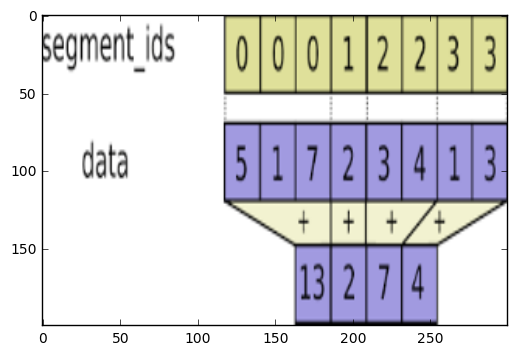

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "download.png"
image = mpimg.imread(filename)
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.image.resize_images(x, (200,300))
    session.run(model)
    result = session.run(x)

print(result.shape)
plt.imshow(result)
plt.show()

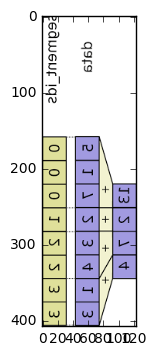

In [26]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "download.png"
image = mpimg.imread(filename)

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    #tf.reset_default_graph()
    x = tf.transpose(x, perm=[1, 0, 2])
    session.run(model)
    result = session.run(x)


plt.imshow(result)
plt.show()

In [35]:
import tensorflow as tf

x = tf.placeholder(tf.float32)
y = 2 * x* x
c = tf.gradients(y,x)
with tf.Session() as session:
    print(session.run(c, feed_dict={x:1}))

[4.0]


In [45]:
import tensorflow as tf

x = tf.constant([1,2,3,4,5], dtype=tf.int32)
y = tf.constant([1,2,3,4,5], dtype=tf.int32)

#축에 따른 최소와 최대값에 대한 인덱스 처리
c = tf.argmin(x,axis=0)
d = tf.argmax(y,axis=0)
with tf.Session() as session:
    print(session.run(c))
    print(session.run(d))

0
4


In [48]:
import tensorflow as tf
x = tf.constant([1, 1, 2, 4, 4, 4, 7, 8, 8])
#유일한 값과 인덱스 정보 처리
y, idx = tf.unique(x)

z = tf.constant([1,2,3])

#차집합의 결과와 인덱스 정보 처리
d, didx = tf.setdiff1d(y,z)

with tf.Session() as session:
    print(session.run(y))
    print(session.run(idx))
    print(session.run(d))
    print(session.run(didx))

[1 2 4 7 8]
[0 0 1 2 2 2 3 4 4]
[4 7 8]
[2 3 4]


In [63]:
import tensorflow as tf
real = tf.constant([2.25, 3.25])
imag = tf.constant([4.75, 5.75])
c = tf.complex(real, imag) 
# Computes the complex absolute value of a tensor.
# sqrt(real**2+ imag**2)
d = tf.complex_abs(c) 
#the complex conjugate of a complex number.
e = tf.conj(c)
with tf.Session() as session:
    print(session.run(c))
    print(session.run(d))
    print(session.run(e))
    # 실수와 허수부분을 분리
    print(session.run(tf.real(c)))
    print(session.run(tf.imag(c)))

[ 2.25+4.75j  3.25+5.75j]
[ 5.25594902  6.60492229]
[ 2.25-4.75j  3.25-5.75j]
[ 2.25  3.25]
[ 4.75  5.75]


In [86]:
import tensorflow as tf
#tf.assert_negative(x, data=None, summarize=None, message=None, name=None)

x = tf.constant([-2.25, -3.25])
y = tf.assert_negative(x)

#tf.assert_positive(x, data=None, summarize=None, message=None, name=None
xp = tf.constant([2.25, 3.25])
yp = tf.assert_positive(xp)

with tf.Session() as session:
    print("y ",type(y))
    print(y.run())
    print("yp ",type(yp))
    print(yp.run())

y  <class 'tensorflow.python.framework.ops.Operation'>
None
yp  <class 'tensorflow.python.framework.ops.Operation'>
None


In [74]:
import tensorflow as tf

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
bias = tf.Variable(1.0)
y_pred = x ** 2 + bias     # x -> x^2 + bias
loss = (y - y_pred)**2     # l2 loss?

with tf.Session() as session:
    #변수 초기화
    session.run(tf.global_variables_initializer())
   
    # OK, print 1.000 = (3**2 + 1 - 9)**2
    print('Loss(x,y) = %.3f' % session.run(loss, {x: 3.0, y: 9.0}))
    # OK, print 10.000; for evaluating y_pred only, input to y is not required
    print('pred_y(x) = %.3f' % session.run(y_pred, {x: 3.0}))
    # OK, print 1.000 bias evaluates to 1.0
    print('bias      = %.3f' % session.run(bias))

Loss(x,y) = 1.000
pred_y(x) = 10.000
bias      = 1.000


In [78]:
assert 2 + 2 == 4, "Houston we've got a problem"
assert 2 + 2 == 3, "Houston we've got a problem"

AssertionError: Houston we've got a problem

In [87]:
import tensorflow as tf

x = tf.Variable(0, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    for i in range(5):
        session.run(model)
        x = x + 1
        print(session.run(x))

1
2
3
4
5


In [88]:
x= 0
for i in range(5) :
    x = x+ 1
    print(x)

1
2
3
4
5


In [90]:
import tensorflow as tf

x = tf.constant(35, name='x')
y = tf.Variable(x + 5, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

40


In [91]:
import tensorflow as tf

x = tf.constant(35, name='x')
y = tf.Variable(x + 5, name='y')

print(y)

Tensor("y_2/read:0", shape=(), dtype=int32)


In [93]:
import tensorflow as tf

x = tf.placeholder("float", 3, name='x')
y = x * 2

print(x)

Tensor("x_4:0", shape=(3,), dtype=float32)


In [94]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


In [125]:
!cd

C:\Users\06411\Documents


(600, 800, 4)
(300, 800, 4)


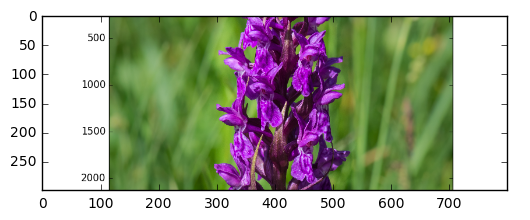

In [133]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# First, load the image again
filename = "MarshOrchid.jpg"
raw_image_data = mpimg.imread(filename)
print(raw_image_data.shape)

image = tf.placeholder("uint8", [None, None, None])
slice = tf.slice(image, [100, 0, 0], [300, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()

In [117]:
help(tf.slice)

Help on function slice in module tensorflow.python.ops.array_ops:

slice(input_, begin, size, name=None)
    Extracts a slice from a tensor.
    
    This operation extracts a slice of size `size` from a tensor `input` starting
    at the location specified by `begin`. The slice `size` is represented as a
    tensor shape, where `size[i]` is the number of elements of the 'i'th dimension
    of `input` that you want to slice. The starting location (`begin`) for the
    slice is represented as an offset in each dimension of `input`. In other
    words, `begin[i]` is the offset into the 'i'th dimension of `input` that you
    want to slice from.
    
    `begin` is zero-based; `size` is one-based. If `size[i]` is -1,
    all remaining elements in dimension i are included in the
    slice. In other words, this is equivalent to setting:
    
    `size[i] = input.dim_size(i) - begin[i]`
    
    This operation requires that:
    
    `0 <= begin[i] <= begin[i] + size[i] <= Di  for i in [0, n

In [136]:
import numpy as np
num_points = 200
vectors_set = []
for i in range(num_points):
    x = np.random.normal(5,5)+15
    y =  x*1000+ (np.random.normal(0,3))*1000
    vectors_set.append([x,y])
    
print(np.shape(vectors_set))
  
x_data = [v[0] for v in vectors_set ]
y_data = [v[1] for v in vectors_set ]

(200, 2)


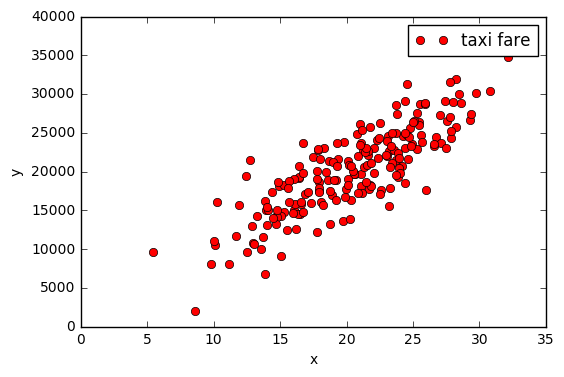

In [138]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'ro',label="taxi fare")
plt.ylim([0,40000])
plt.xlim([0,35])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [170]:
a = []
a.append([1,10])
a.append([2,20])
print(a)
print(np.shape(a))
print(a[0],a[1])
for i in a :
    print(i)
    
print([j[0] for j in a])
print([j[1] for j in a])

[[1, 10], [2, 20]]
(2, 2)
[1, 10] [2, 20]
[1, 10]
[2, 20]
[1, 2]
[10, 20]


In [164]:

x_old = 0
x_new = 1 # The algorithm starts at x=1
eps = 0.001 # step size
precision = 0.5

def f_prime(x):    
    return  0.1*2*(x+ 4) + 0.3

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new = x_old - eps * f_prime(x_old)
print("Local minimum occurs at ", x_new)

Local minimum occurs at  0.9987


In [150]:
import tensorflow as tf

x = tf.placeholder(tf.float32)
y = x**2
c = tf.gradients(y,x)
with tf.Session() as sess :
    print(sess.run(c, feed_dict={x:1}))

[2.0]


In [160]:
dir(tf.train.GradientDescentOptimizer)

['GATE_GRAPH',
 'GATE_NONE',
 'GATE_OP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_dense',
 '_apply_sparse',
 '_assert_valid_dtypes',
 '_create_slots',
 '_finish',
 '_get_or_make_slot',
 '_prepare',
 '_resource_apply_dense',
 '_resource_apply_sparse',
 '_slot_dict',
 '_valid_dtypes',
 '_zeros_slot',
 'apply_gradients',
 'compute_gradients',
 'get_name',
 'get_slot',
 'get_slot_names',
 'minimize']

In [161]:
help(tf.train.GradientDescentOptimizer.minimize)

Help on function minimize in module tensorflow.python.training.optimizer:

minimize(self, loss, global_step=None, var_list=None, gate_gradients=1, aggregation_method=None, colocate_gradients_with_ops=False, name=None, grad_loss=None)
    Add operations to minimize `loss` by updating `var_list`.
    
    This method simply combines calls `compute_gradients()` and
    `apply_gradients()`. If you want to process the gradient before applying
    them call `compute_gradients()` and `apply_gradients()` explicitly instead
    of using this function.
    
    Args:
      loss: A `Tensor` containing the value to minimize.
      global_step: Optional `Variable` to increment by one after the
        variables have been updated.
      var_list: Optional list of `Variable` objects to update to minimize
        `loss`.  Defaults to the list of variables collected in the graph
        under the key `GraphKeys.TRAINABLE_VARIABLES`.
      gate_gradients: How to gate the computation of gradients.  Can b

In [172]:
import tensorflow as tf

weights = tf.Variable(tf.random_normal([3, 3], stddev=0.1))
biases = tf.Variable(tf.zeros([3]))

In [187]:
import tensorflow as tf

weights = tf.Variable(tf.random_normal([3, 3], stddev=0.1))
biases = tf.Variable(tf.zeros([3]))

y = weights*10 - biases
init_op = tf.global_variables_initializer()

with  tf.Session() as sess : 
    # Runs the initialization.
    sess.run(init_op)
    # You can now evaluate the variables.
    print(weights.eval())
    # Or, e.g., its mean value along second dimension
    print(tf.reduce_mean(weights, 1).eval())
    print(y.eval())
    
    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()
    print(saver)
    # Save the variables to disk.
    save_path = saver.save(sess, "./data.ckpt")
    print(save_path)

with  tf.Session() as sess : 
    print("-----------  restore  ----------------")
    saver = tf.train.Saver()
    print(saver)
    res = saver.restore(sess, "./data.ckpt")
    print(res)
     # You can now evaluate the variables.
    print(weights.eval())
    # Or, e.g., its mean value along second dimension
    print(tf.reduce_mean(weights, 1).eval())
    y2 = weights*20 - biases

    print(y2.eval())

[[-0.10710801 -0.02363504 -0.19158746]
 [-0.01806399 -0.07672255 -0.04324723]
 [-0.05202121  0.10207367  0.0297291 ]]
[-0.10744351 -0.04601126  0.02659385]
[[-1.07108009 -0.23635043 -1.9158746 ]
 [-0.18063991 -0.76722556 -0.43247235]
 [-0.52021211  1.02073669  0.29729098]]
./data.ckpt
-----------  restore  ----------------
None
[[-0.10710801 -0.02363504 -0.19158746]
 [-0.01806399 -0.07672255 -0.04324723]
 [-0.05202121  0.10207367  0.0297291 ]]
[-0.10744351 -0.04601126  0.02659385]
[[-2.14216018 -0.47270086 -3.8317492 ]
 [-0.36127982 -1.53445113 -0.8649447 ]
 [-1.04042423  2.04147339  0.59458196]]


In [178]:
res = saver.restore(sess, "/tmp/model.ckpt")


C:\Users\06411\Documents


In [176]:
help(saver.save)

Help on method save in module tensorflow.python.training.saver:

save(sess, save_path, global_step=None, latest_filename=None, meta_graph_suffix='meta', write_meta_graph=True, write_state=True) method of tensorflow.python.training.saver.Saver instance
    Saves variables.
    
    This method runs the ops added by the constructor for saving variables.
    It requires a session in which the graph was launched.  The variables to
    save must also have been initialized.
    
    The method returns the path of the newly created checkpoint file.  This
    path can be passed directly to a call to `restore()`.
    
    Args:
      sess: A Session to use to save the variables.
      save_path: String.  Path to the checkpoint filename.  If the saver is
        `sharded`, this is the prefix of the sharded checkpoint filename.
      global_step: If provided the global step number is appended to
        `save_path` to create the checkpoint filename. The optional argument
        can be a `Tensor`